# Working With Imbalanced Data

## Installation via Anaconda command line
Paste following code and hit enter:

conda install -c glemaitre imbalanced-learn


## Oversampling
One way to fight this issue is to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. The RandomOverSampler offers such scheme:


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Make some data:

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)




/anaconda/envs/ml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X, y)

# Count each value of y

print(pd.Series(y_resampled).value_counts())



2    4674
1    4674
0    4674
dtype: int64


In [8]:
#proportions
print(pd.Series(y).value_counts(normalize=True))


2    0.9348
1    0.0524
0    0.0128
dtype: float64


#The augmented data set should be used instead of the original data set to train a classifier:



In [9]:
# Notice that we run a model on the original data, then the resampled data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

logreg = LogisticRegression().fit(X,y)
y_pred = logreg.predict(X) # y_pred includes your predictions

print(classification_report(y, y_pred)) # precision recall and f1
print(logreg.score(X, y)) #accuracy 



             precision    recall  f1-score   support

          0       1.00      0.19      0.32        64
          1       0.81      0.68      0.74       262
          2       0.98      1.00      0.99      4674

avg / total       0.97      0.97      0.97      5000

0.9726


In [10]:
# The resampled model influences precision and recall for categories with imbalanced data

logreg = LogisticRegression().fit(X_resampled,y_resampled)
y_pred = logreg.predict(X_resampled) # y_pred includes your predictions

print(classification_report(y_resampled, y_pred)) # precision recall and f1
print(logreg.score(X_resampled, y_resampled)) #accuracy 

             precision    recall  f1-score   support

          0       0.81      0.76      0.78      4674
          1       0.89      0.80      0.84      4674
          2       0.79      0.93      0.85      4674

avg / total       0.83      0.83      0.83     14022

0.8266295820852946


As a result, the majority class does not take over the other classes during the training process. Consequently, all classes are represented by the decision function.

# Plot random oversampling

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler

print(__doc__)

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random over-sampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)



Automatically created module for IPython interactive environment


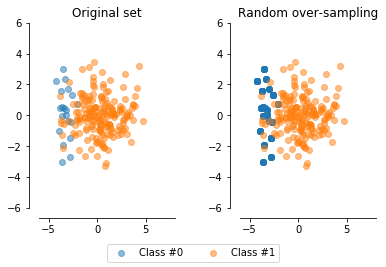

In [12]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('Random over-sampling')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

# Random Undersampling

0    900
1    100
dtype: int64


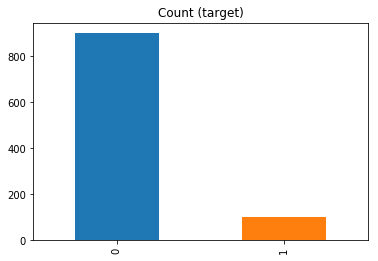

In [89]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');


print(pd.Series(y).value_counts())



In [90]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_sample(X, y)

print(pd.Series(y_resampled).value_counts())


1    100
0    100
dtype: int64


Of course we lose a lot of data when we undersample.  Better to oversample minority class while keeping the signal from the data, if possible.
### Enter Synthetic Minority Oversampling Technique (SMOTE)

In [91]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)



In [92]:
#Original Data
print(pd.Series(y).value_counts())


0    900
1    100
dtype: int64


In [93]:
#New Data

print(pd.Series(y_sm).value_counts())


1    900
0    900
dtype: int64


## Modeling smote data

In [94]:
#Original data fit

logreg = LogisticRegression().fit(X,y)
y_pred = logreg.predict(X) # y_pred includes your predictions

print(classification_report(y, y_pred)) # precision recall and f1
print(logreg.score(X, y)) #accuracy 

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       900
          1       0.99      0.87      0.93       100

avg / total       0.99      0.99      0.99      1000

0.986


In [95]:
# Smote oversample of minority classes

smote = SMOTE(ratio='minority')

X_sm, y_sm = smote.fit_sample(X, y)

In [96]:
#smote data fit

logreg = LogisticRegression().fit(X_sm,y_sm)
y_pred = logreg.predict(X_sm) # y_pred includes your predictions

print(classification_report(y_sm, y_pred)) # precision recall and f1
print(logreg.score(X_sm, y_sm)) #accuracy 

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       900
          1       0.97      0.97      0.97       900

avg / total       0.97      0.97      0.97      1800

0.9688888888888889


## Combination of over- and under-sampling

In [115]:
# We can use SMOTE with a second technique that dismisses nearest
# neighbors that have diff't classes before creating synthetic observations (i.e.-delete all Tomek links)


from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='minority')
X_smt, y_smt = smt.fit_sample(X, y)

logreg = LogisticRegression().fit(X_smt,y_smt)
y_pred = logreg.predict(X_smt) # y_pred includes your predictions

print(classification_report(y_smt, y_pred)) # precision recall and f1
print(logreg.score(X_smt, y_smt)) #accuracy increases a bit, but we should test on new data

             precision    recall  f1-score   support

       '-1'       0.88      0.90      0.89     10894
        '1'       0.90      0.88      0.89     10894

avg / total       0.89      0.89      0.89     21788

0.8899853130163393


## Now you try to improve prediction error on new data:

- transform the data
- train test split
- later can refer to train and test dataset

In [3]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
bc_load_data = load_breast_cancer()

print(list(bc_load_data.target_names))

y = bc_load_data.target
X = bc_load_data.data

print(pd.Series(y).value_counts(normalize=True))

X.shape


['malignant', 'benign']
1    0.627417
0    0.372583
dtype: float64


(569, 30)

In [4]:
# We didn't split data into training and test sets consistently above. But you should do so here to score test data.

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

#Original Data
print(pd.Series(y).value_counts())

#New Data

print(pd.Series(y_sm).value_counts())


1    357
0    212
dtype: int64
1    357
0    357
dtype: int64


In [6]:
#Original data fit

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

logreg = LogisticRegression().fit(X,y)
y_pred = logreg.predict(X) # y_pred includes your predictions

print(classification_report(y, y_pred)) # precision recall and f1
print(logreg.score(X, y)) #accuracy 

             precision    recall  f1-score   support

          0       0.96      0.93      0.95       212
          1       0.96      0.97      0.97       357

avg / total       0.96      0.96      0.96       569

0.9595782073813708


In [7]:
# Smote oversample of minority classes

smote = SMOTE(ratio='minority')

X_sm, y_sm = smote.fit_sample(X, y)

In [8]:
#smote data fit

logreg = LogisticRegression().fit(X_sm,y_sm)
y_pred = logreg.predict(X_sm) # y_pred includes your predictions

print(classification_report(y_sm, y_pred)) # precision recall and f1
print(logreg.score(X_sm, y_sm)) #accuracy 

             precision    recall  f1-score   support

          0       0.97      0.96      0.96       357
          1       0.96      0.97      0.96       357

avg / total       0.96      0.96      0.96       714

0.9607843137254902


In [9]:
# We can use SMOTE with a second technique that dismisses nearest
# neighbors that have diff't classes before creating synthetic observations (i.e.-delete all Tomek links)


from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='minority')
X_smt, y_smt = smt.fit_sample(X, y)


print(pd.Series(y_smt).value_counts())

1    354
0    354
dtype: int64


/anaconda/envs/ml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
logreg = LogisticRegression().fit(X_smt,y_smt)
y_pred = logreg.predict(X_smt) # y_pred includes your predictions

print(classification_report(y_smt, y_pred)) # precision recall and f1
print(logreg.score(X_smt, y_smt)) #accuracy increases a bit, but we should test on new data

             precision    recall  f1-score   support

          0       0.97      0.96      0.97       354
          1       0.96      0.97      0.97       354

avg / total       0.97      0.97      0.97       708

0.9661016949152542
